In [2]:
#import the necessary module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Função Dendograma

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

In [3]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Import RMM

RDPC: Mediana do rendimento domiciliar per capita

ESCOLARIDADE1: % de pessoas sem instrução ou com fundamental incompleto e 18 anos ou mais de idade

ESCOLARIDADE4: % de pessoas com superior completo e 18 anos ou mais de idade

MAQUINA: % de pessoas em domicílios com existência de máquina de lavar

COMPUTADOR: % de pessoas em domicílios com existência de computador com acesso à Internet

In [4]:
rmm = pd.read_csv("rmm-cluster.csv", encoding="latin-1")
rmm["rdpc"] = rmm["rdpc"]/100
rmm.head()

,aponds,nomes,cidade,rdpc,escolaridade1,escolaridade4,computador,maquina
0,4101150001001,Ângulo,Ângulo,500.0,0.551524,0.050798,0.723404,0.261752
1,4102109001001,Astorga,Astorga,550.0,0.506964,0.084680,0.683924,0.318580
2,4102208001001,Atalaia,Atalaia,510.0,0.533659,0.077073,0.833641,0.288404
3,4103206001001,Bom Sucesso,Bom Sucesso,455.0,0.594613,0.061953,0.660929,0.115880
4,4103800001001,Cambira,Cambira,510.0,0.522413,0.068622,0.699897,0.532206


In [5]:
rmm.shape

(52, 8)

In [6]:
rmm.describe()

,aponds,rdpc,escolaridade1,escolaridade4,computador,maquina
count,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000
mean,4.114695e+12,654.419135,0.434547,0.113758,0.774183,0.575559
std,6.133303e+09,248.220992,0.129215,0.095174,0.087660,0.215579
min,4.101150e+12,416.670000,0.104918,0.008155,0.554054,0.115880
25%,4.113228e+12,510.000000,0.350356,0.057104,0.712250,0.392192
50%,4.115200e+12,550.000000,0.460906,0.082902,0.782182,0.569868
75%,4.115477e+12,703.187500,0.533931,0.126372,0.822507,0.782558
max,4.126256e+12,1503.330000,0.640163,0.408738,0.960720,0.945584


# Padroniza

In [7]:
X = rmm.iloc[:, 3:8].values

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ward

n_clusters: número de clusters

distance_threshold: é limite que permite que os pontos possam ser agrupados em um cluster, desse modo, quando essa distância for maior que o valor declarado, o algoritmo não os junta

In [9]:
model_ward = AgglomerativeClustering(linkage = "ward", 
                                     distance_threshold = 5, 
                                     n_clusters = None).fit(X_scaled)

rmm["Cluster_ward"] = model_ward.labels_   
rmm["Cluster_ward"].value_counts()        

0    28
2    17
1     7
Name: Cluster_ward, dtype: int64

In [10]:
print("Silhouette: ", metrics.silhouette_score(X_scaled, rmm["Cluster_ward"]))

Silhouette:  0.44452361898475873


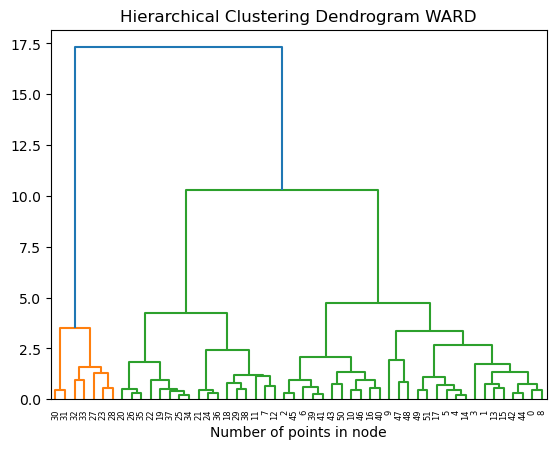

In [11]:
plt.title("Hierarchical Clustering Dendrogram WARD")
plot_dendrogram(model_ward)
plt.xlabel("Number of points in node")
plt.show()

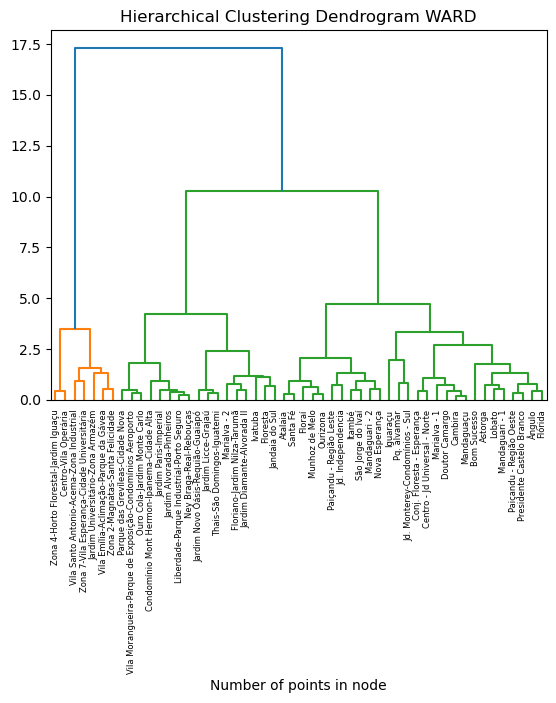

In [12]:
rmm2 = rmm.set_index("nomes")

plt.title("Hierarchical Clustering Dendrogram WARD")
plot_dendrogram(model_ward, labels = rmm2.index)
plt.xlabel("Number of points in node")
plt.show()

# Average

In [9]:
model_average = AgglomerativeClustering(linkage = "average", 
                                distance_threshold = 3, 
                                n_clusters = None).fit(X_scaled)

rmm["Cluster_average"] = model_average.labels_          

In [14]:
rmm["Cluster_average"].value_counts()

0    45
1     7
Name: Cluster_average, dtype: int64

In [15]:
print("Silhouette: ", metrics.silhouette_score(X_scaled, rmm["Cluster_average"]))

Silhouette:  0.6041123233884549


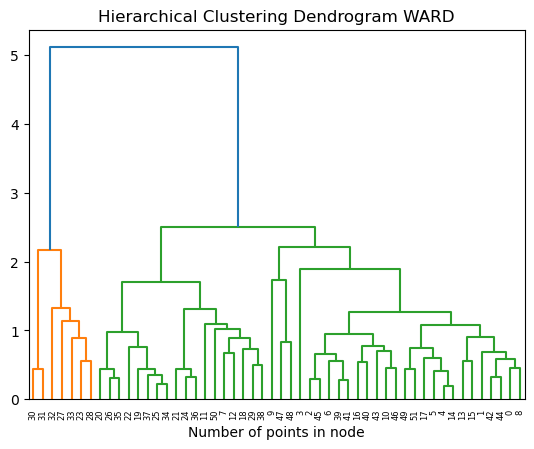

In [16]:
plt.title("Hierarchical Clustering Dendrogram WARD")
plot_dendrogram(model_average)
plt.xlabel("Number of points in node")
plt.show()

# PCA Visualizar

In [18]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
sum(pca.explained_variance_ratio_)

0.9119968889798029

Text(0, 0.5, 'PC2')

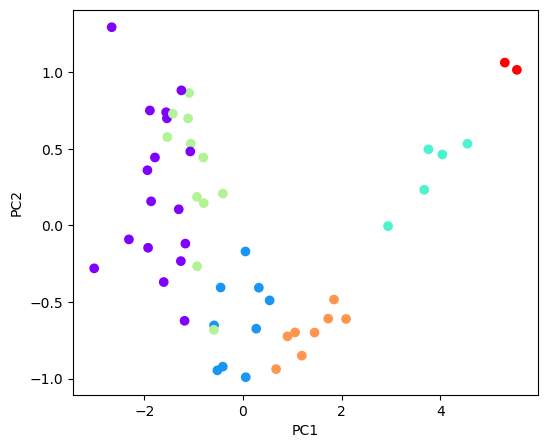

In [19]:
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:,0], X_pca[:,1], c = model_ward.labels_, cmap='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")

# Descritiva

RDPC: Mediana do rendimento domiciliar per capita

ESCOLARIDADE1: % de pessoas sem instrução ou com fundamental incompleto e 18 anos ou mais de idade

ESCOLARIDADE4: % de pessoas com superior completo e 18 anos ou mais de idade

MAQUINA: % de pessoas em domicílios com existência de máquina de lavar

COMPUTADOR: % de pessoas em domicílios com existência de computador com acesso à Internet

In [21]:
 rmm.groupby("Cluster_ward")["aponds"].count()

Cluster_ward
0    28
1     7
2    17
Name: aponds, dtype: int64

In [22]:
means_K = rmm.groupby("Cluster_ward").mean()
means_K.iloc[:, 1:6].reset_index().round(2)

,Cluster_ward,rdpc,escolaridade1,escolaridade4,computador,maquina
0,0,515.03,0.53,0.06,0.72,0.40
1,1,1208.99,0.18,0.33,0.91,0.87
2,2,655.65,0.39,0.11,0.80,0.74


In [25]:
cv_K = rmm.groupby("Cluster_ward").std() / rmm.groupby("Cluster_ward").mean()*100
display(cv_K.iloc[:, 1:6].reset_index().round(2))

,Cluster_ward,rdpc,escolaridade1,escolaridade4,computador,maquina
0,0,6.22,8.79,40.77,9.66,28.95
1,1,17.46,29.96,18.01,3.49,4.91
2,2,14.78,14.79,37.69,6.48,10.66


In [24]:
(rmm
    .groupby("Cluster_ward")
    .nomes
    .agg(list)
    .to_frame("ids")
    .reset_index()
           )

,Cluster_ward,ids
0,0,"[Ângulo, Astorga, Atalaia, Bom Sucesso, Cambir..."
1,1,"[Vila Emília-Aclimação-Parque da Gávea, Jardim..."
2,2,"[Floresta, Ivatuba, Jandaia do Sul, Marialva -..."
